In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/IT24102955/AI-ML-Project/refs/heads/main/data/raw/IT24104124.csv')

##Numerical Feature Scaling

Here for numerical feature scaling we are going to use Robust Scaler. The main Reason for using robust scaler is our dataset contain some outliers since we didn't remove all the outliers robust scaler is resistent to outliers.

Advantages of using Robust Scaler
1. Resistent to outliers


*   Outliers don’t affect the scaling as much because the median and IQR (Q3 – Q1) are robust statistics
*  Example: If one salary is 10 million while most are around 10k–50k, RobustScaler won’t let that single value dominate the scale.

2. Works Well for Skewed Data


*   Since it’s not tied to the mean, it can handle skewed distributions better than StandardScaler.






In [3]:
# import the Robustscaler
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()

In [4]:
# selecting the numerical features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()

In [5]:
# fitting the data to the scaler
r_scaler.fit(data_df[numerical_features])

RobustScaler()

In [6]:
# transform the numerical data after learning the from the data
data_df[numerical_features]=r_scaler.transform(data_df[numerical_features])

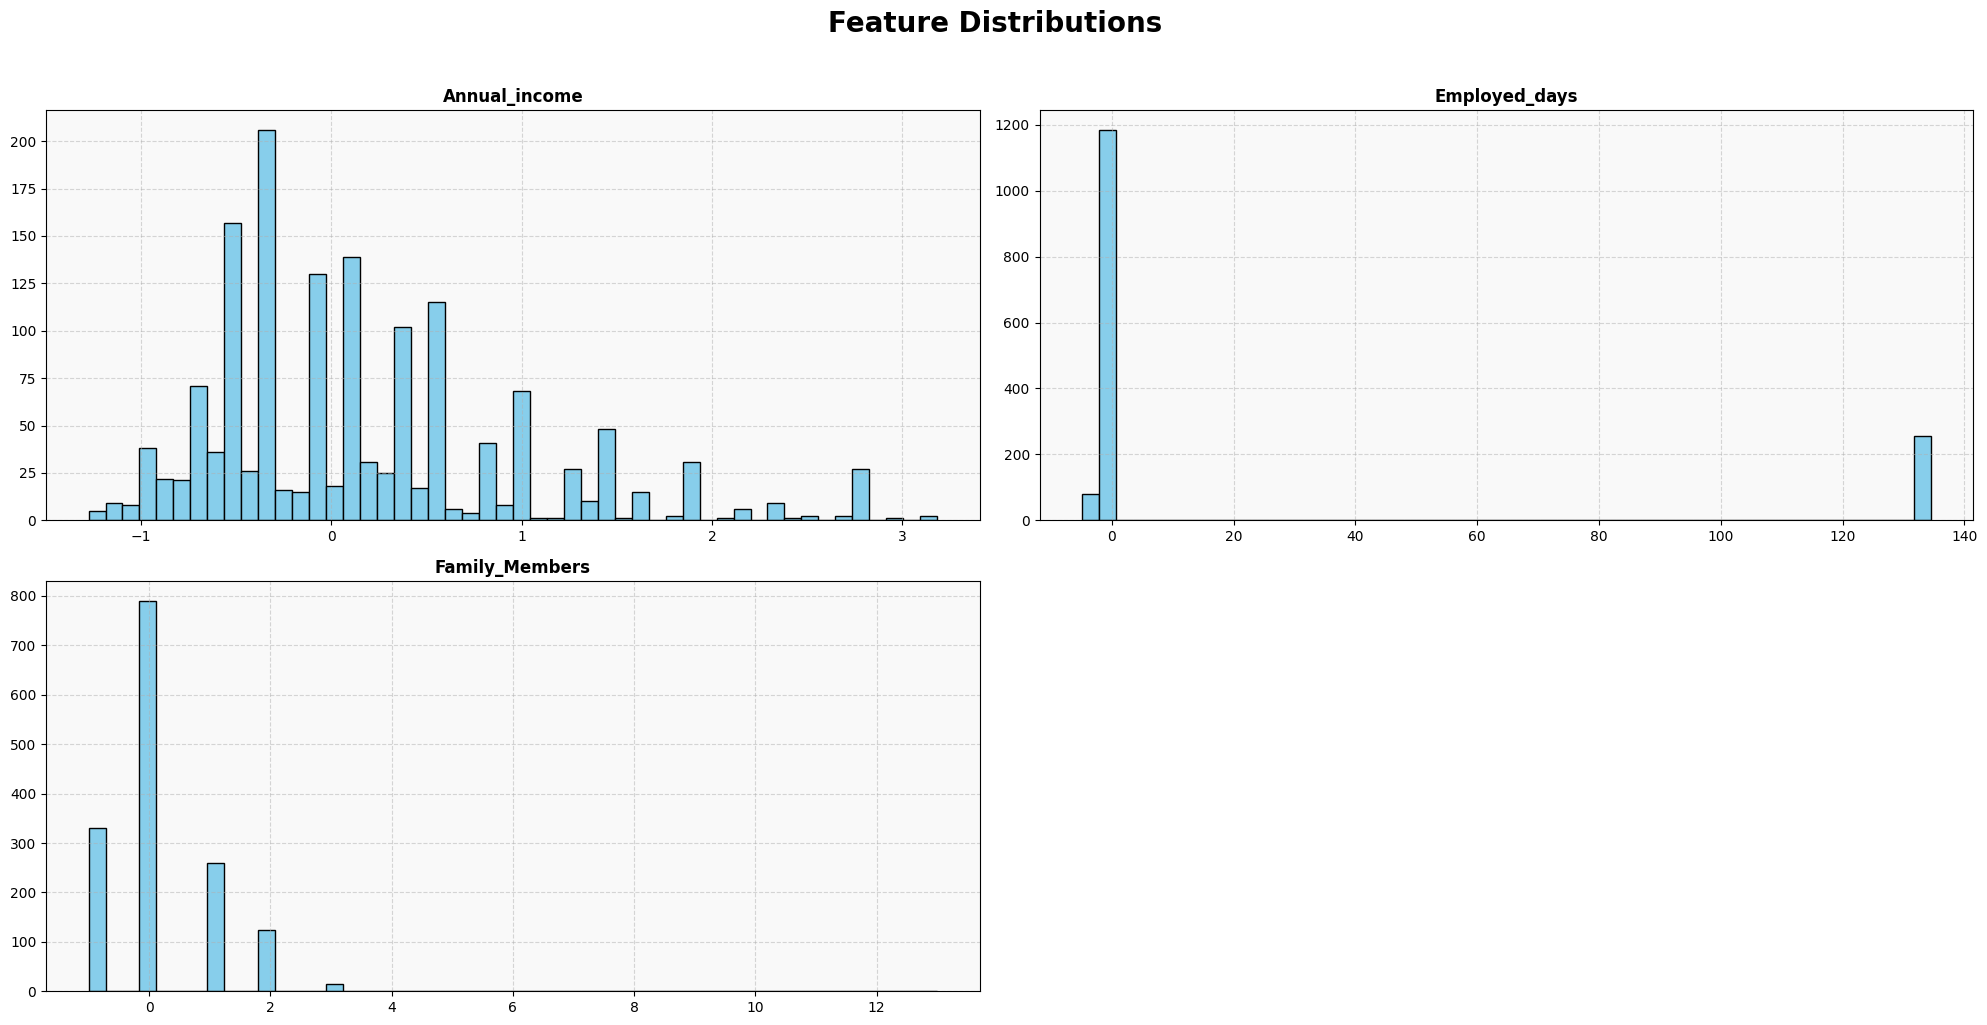

In [7]:
# numerical feature distribution after scaling with RobustScaler
ax = data_df.hist(
    bins=50,
    figsize=(20, 10),
    color='skyblue',
    edgecolor='black',
    grid=False
)


for a in ax.ravel():
    a.set_facecolor("#f9f9f9")
    a.grid(True, linestyle='--', alpha=0.5)
    a.tick_params(axis='x', labelsize=10)
    a.tick_params(axis='y', labelsize=10)
    a.set_title(a.get_title(), fontsize=12, fontweight='bold')


plt.suptitle("Feature Distributions", fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

we can see that after using robustscaler we were able to scale the annual_income feature but employed_days column still have a larger range so now we can use Standardscaler to sclae the employed_days columns

In [8]:
from sklearn.preprocessing import StandardScaler
s_scaler=StandardScaler()

In [9]:
data_df['Employed_days']=s_scaler.fit_transform(data_df[['Employed_days']])

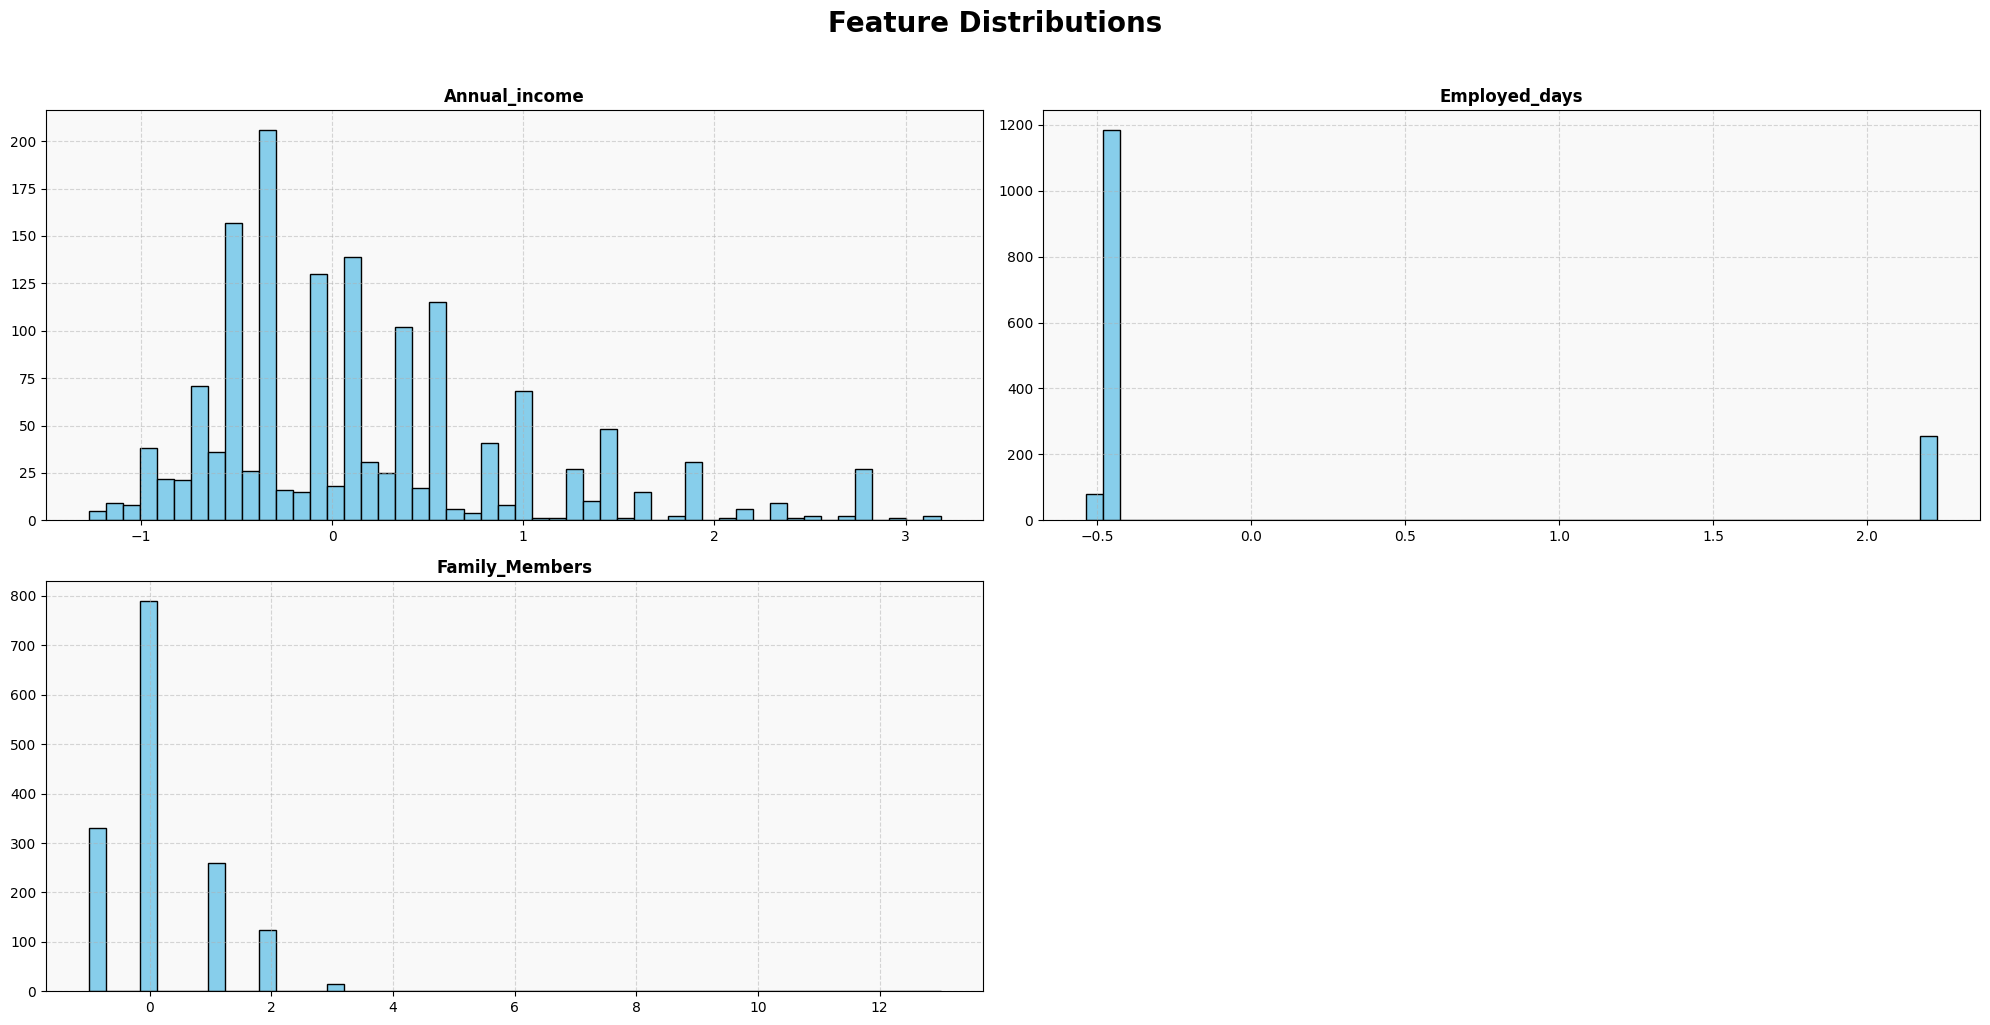

In [10]:
# numerical feature distribution after scaling with RobustScaler
ax = data_df.hist(
    bins=50,
    figsize=(20, 10),
    color='skyblue',
    edgecolor='black',
    grid=False
)


for a in ax.ravel():
    a.set_facecolor("#f9f9f9")
    a.grid(True, linestyle='--', alpha=0.5)
    a.tick_params(axis='x', labelsize=10)
    a.tick_params(axis='y', labelsize=10)
    a.set_title(a.get_title(), fontsize=12, fontweight='bold')


plt.suptitle("Feature Distributions", fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

now all our numerical features are scaled successfuly

In [11]:
data_df.to_csv('IT24101153.csv',index=False)